<a href="https://colab.research.google.com/github/SChiu-project/CUSCSm2-case/blob/main/Titanic_sample_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.linkedin.com/pulse/titanic-survivors-prediction-machine-learning-anant-agarwal

1. Loading Libraries required
2. Mount your Google Drive to Collaboratory
3. Basic stat
4. check for missing value
5. Relationship between variables and Label
6. Tidy up data
7. ML Model 1 - Random Forest
8. ML Model 2 - SVM
9. ML Model 3 - Decision Tree

1. Loading Libraries required

In [ ]:
# Loading Libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

2. Mount your Google Drive to Collaboratory

In [ ]:
# Mount your Google Drive to Collaboratory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Loading Datasets
titanic_train = pd.read_csv('gdrive/My Drive/CUSCS - Case data/train.csv')
titanic_eval = pd.read_csv('gdrive/My Drive/CUSCS - Case data/eval.csv')


3. Basic stat

In [ ]:
#Basic stat
titanic_train.shape #Total rows and columns in Training dataset

(627, 10)

In [ ]:
#Basic stat
titanic_train.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [ ]:
#Basic stat
titanic_train.describe(include=['O'])

,sex,class,deck,embark_town,alone
count,627,627,627,627,627
unique,2,3,8,4,2
top,male,Third,unknown,Southampton,y
freq,410,341,481,450,372


4. check for missing value

In [ ]:
# check for missing value
titanic_train.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

5. Relationship between variables and Label

<Axes: xlabel='class', ylabel='survived'>

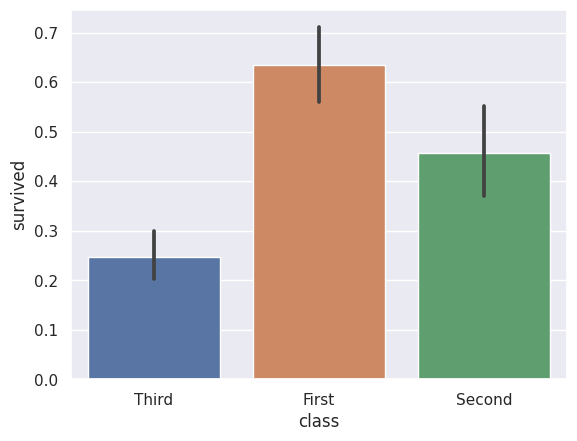

In [ ]:
# Relationship between Class and Survival
sns.barplot(x='class', y='survived', data=titanic_train)

In [ ]:
# Relationship between Sex vs. Survival
titanic_train.groupby('sex').survived.value_counts()

sex     survived
female  1           169
        0            48
male    0           336
        1            74
Name: survived, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

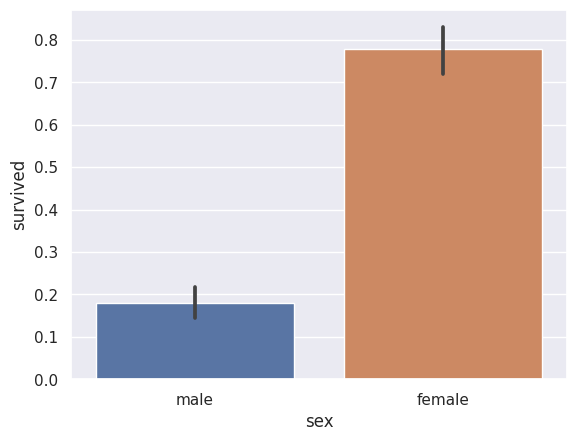

In [ ]:
# Relationship between Sex vs. Survival
sns.barplot(x='sex', y='survived', data=titanic_train)

In [ ]:
#Embarked vs. Survived
titanic_train[['embark_town', 'survived']].groupby(['embark_town'], as_index=False).mean()

,embark_town,survived
0,Cherbourg,0.593496
1,Queenstown,0.358491
2,Southampton,0.333333
3,unknown,1.000000


<Axes: xlabel='embark_town', ylabel='survived'>

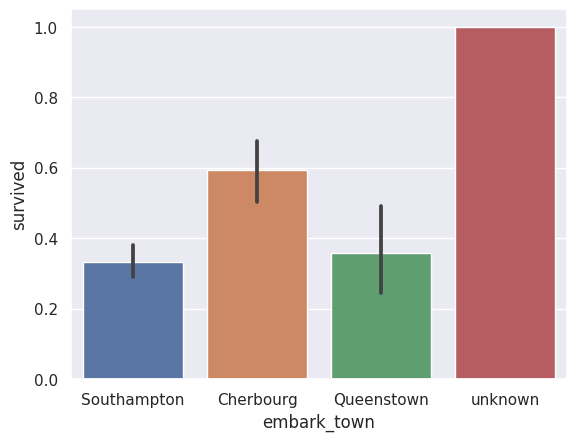

In [ ]:
#Embarked vs. Survived
sns.barplot(x='embark_town', y='survived', data=titanic_train)

In [ ]:
# Parch vs. Survival
titanic_train[['parch', 'survived']].groupby(['parch'], as_index=False).mean()


,parch,survived
0,0,0.348739
1,1,0.541176
2,2,0.500000
3,3,0.666667
4,4,0.000000
5,5,0.250000


<ipython-input-15-fdbee287dedb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='parch', y='survived', ci=None, data=titanic_train) # ci=None will hide the error bar


<Axes: xlabel='parch', ylabel='survived'>

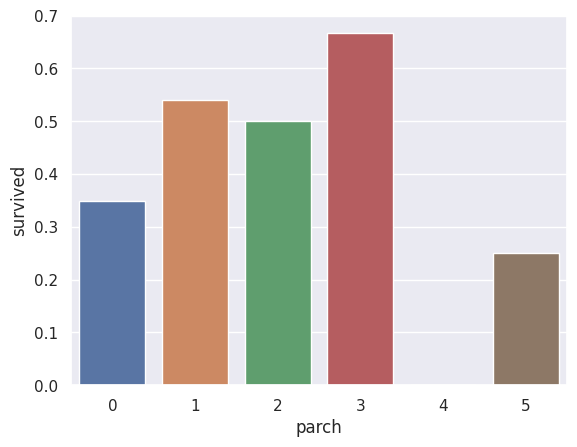

In [ ]:
# Parch vs. Survival
sns.barplot(x='parch', y='survived', ci=None, data=titanic_train) # ci=None will hide the error bar


<Axes: xlabel='sex', ylabel='age'>

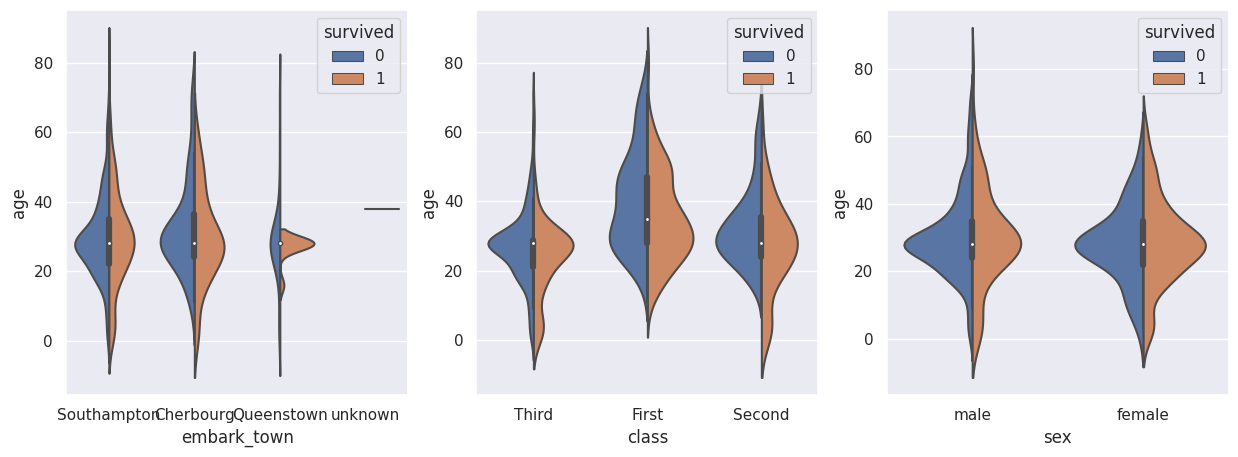

In [ ]:
# Age vs. Survival
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="embark_town", y="age", hue="survived", data=titanic_train, split=True, ax=ax1)
sns.violinplot(x="class", y="age", hue="survived", data=titanic_train, split=True, ax=ax2)
sns.violinplot(x="sex", y="age", hue="survived", data=titanic_train, split=True, ax=ax3)



<ipython-input-17-8ab6f4a8c5b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_train.corr(), vmax=0.6, square=True, annot=True)


<Axes: >

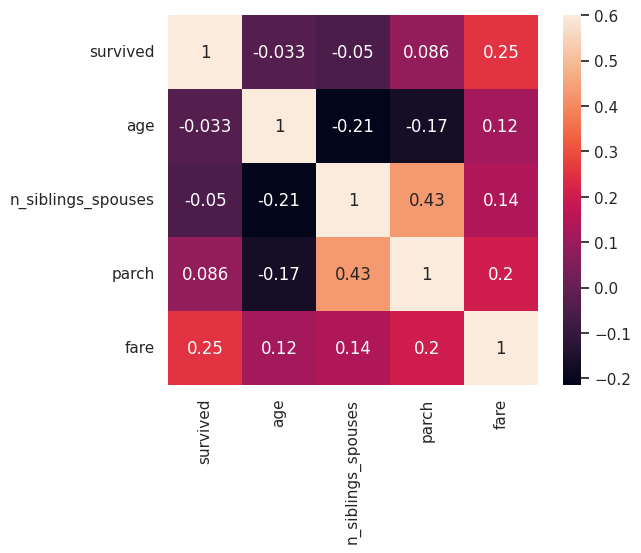

In [ ]:
# heatmap
sns.heatmap(titanic_train.corr(), vmax=0.6, square=True, annot=True)


6. Tidy up data in both train and eval


In [ ]:
#combine 2 data set
titanic_combined = [titanic_train, titanic_eval] # combining train and test dataset

In [ ]:
titanic_combined

[     survived     sex   age  n_siblings_spouses  parch     fare   class  \
 0           0    male  22.0                   1      0   7.2500   Third   
 1           1  female  38.0                   1      0  71.2833   First   
 2           1  female  26.0                   0      0   7.9250   Third   
 3           1  female  35.0                   1      0  53.1000   First   
 4           0    male  28.0                   0      0   8.4583   Third   
 ..        ...     ...   ...                 ...    ...      ...     ...   
 622         0    male  28.0                   0      0  10.5000  Second   
 623         0    male  25.0                   0      0   7.0500   Third   
 624         1  female  19.0                   0      0  30.0000   First   
 625         0  female  28.0                   1      2  23.4500   Third   
 626         0    male  32.0                   0      0   7.7500   Third   
 
         deck  embark_town alone  
 0    unknown  Southampton     n  
 1          C   

In [ ]:
# convert sex
for dataset in titanic_combined:
    dataset['sex'] = dataset['sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
# convert age
# This categorizes age into 5 different age range
for dataset in titanic_combined:
    age_avg = dataset['age'].mean()
    age_std = dataset['age'].std()
    age_null_count = dataset['age'].isnull().sum()

    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['age'][np.isnan(dataset['age'])] = age_null_random_list
    dataset['age'] = dataset['age'].astype(int)

titanic_train['AgeBand'] = pd.cut(titanic_train['age'], 5)


print (titanic_train[['AgeBand', 'survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  survived
0  (-0.08, 16.0]  0.507937
1   (16.0, 32.0]  0.358289
2   (32.0, 48.0]  0.391304
3   (48.0, 64.0]  0.500000
4   (64.0, 80.0]  0.125000


<ipython-input-21-6ca7cdb0044b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['age'][np.isnan(dataset['age'])] = age_null_random_list


In [ ]:
# map Age according to AgeBand
for dataset in titanic_combined:
    dataset.loc[ dataset['age'] <= 16, 'age'] = 0
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[ dataset['age'] > 64, 'age'] = 4

In [ ]:
# Combining SibSp & Parch feature, we create a new feature named FamilySize
for dataset in titanic_combined:
    dataset['FamilySize'] = dataset['n_siblings_spouses'] +  dataset['parch'] + 1

print (titanic_train[['FamilySize', 'survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  survived
0           1  0.306452
1           2  0.545455
2           3  0.600000
3           4  0.736842
4           5  0.200000
5           6  0.125000
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [ ]:
#compare with alone
for dataset in titanic_combined:
    dataset['alone'] = dataset['alone'].map( {'y': 1, 'n': 0} ).astype(int)

In [ ]:
print (titanic_train[['alone', 'survived']].groupby(['alone'], as_index=False).mean())
# match the data in family size

   alone  survived
0      0  0.505882
1      1  0.306452


In [ ]:
# bug fix
pd.value_counts(titanic_train.alone)

1    372
0    255
Name: alone, dtype: int64

In [ ]:
pd.value_counts(titanic_eval.alone)

1    165
0     99
Name: alone, dtype: int64

In [ ]:
# fare
titanic_train['FareBand'] = pd.qcut(titanic_train['fare'], 4)

print (titanic_train[['FareBand', 'survived']].groupby(['FareBand'], as_index=False).mean())

            FareBand  survived
0    (-0.001, 7.896]  0.182390
1    (7.896, 15.046]  0.309677
2   (15.046, 31.388]  0.471338
3  (31.388, 512.329]  0.589744


In [ ]:
# map fare into 4 groups
for dataset in titanic_combined:
    dataset.loc[ dataset['fare'] <= 7.90, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.90) & (dataset['fare'] <= 15.05), 'fare'] = 1

    dataset.loc[(dataset['fare'] > 15.05) & (dataset['fare'] <= 31.39), 'fare']   = 2
    dataset.loc[ dataset['fare'] > 31.39, 'fare'] = 3
    dataset['fare'] = dataset['fare'].astype(int)

In [ ]:
titanic_train

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,AgeBand,FamilySize,FareBand
0,0,0,1,1,0,0,Third,unknown,Southampton,0,"(16.0, 32.0]",2,"(-0.001, 7.896]"
1,1,1,2,1,0,3,First,C,Cherbourg,0,"(32.0, 48.0]",2,"(31.388, 512.329]"
2,1,1,1,0,0,1,Third,unknown,Southampton,1,"(16.0, 32.0]",1,"(7.896, 15.046]"
3,1,1,2,1,0,3,First,C,Southampton,0,"(32.0, 48.0]",2,"(31.388, 512.329]"
4,0,0,1,0,0,1,Third,unknown,Queenstown,1,"(16.0, 32.0]",1,"(7.896, 15.046]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,0,0,1,0,0,1,Second,unknown,Southampton,1,"(16.0, 32.0]",1,"(7.896, 15.046]"
623,0,0,1,0,0,0,Third,unknown,Southampton,1,"(16.0, 32.0]",1,"(-0.001, 7.896]"
624,1,1,1,0,0,2,First,B,Southampton,1,"(16.0, 32.0]",1,"(15.046, 31.388]"
625,0,1,1,1,2,2,Third,unknown,Southampton,0,"(16.0, 32.0]",4,"(15.046, 31.388]"


In [ ]:
# classes
for dataset in titanic_combined:
    dataset['class'] = dataset['class'].map( {'First': 1, 'Second': 2, 'Third': 3} ).astype(int)

In [ ]:
# embark_town
for dataset in titanic_combined:
    #print(dataset.Embarked.unique())
    dataset['embark_town'] = dataset['embark_town'].map( {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2, 'unknown': 0} ).astype(int)

In [ ]:
titanic_combined


[     survived  sex  age  n_siblings_spouses  parch  fare  class     deck  \
 0           0    0    1                   1      0     0      3  unknown   
 1           1    1    2                   1      0     3      1        C   
 2           1    1    1                   0      0     1      3  unknown   
 3           1    1    2                   1      0     3      1        C   
 4           0    0    1                   0      0     1      3  unknown   
 ..        ...  ...  ...                 ...    ...   ...    ...      ...   
 622         0    0    1                   0      0     1      2  unknown   
 623         0    0    1                   0      0     0      3  unknown   
 624         1    1    1                   0      0     2      1        B   
 625         0    1    1                   1      2     2      3  unknown   
 626         0    0    1                   0      0     0      3  unknown   
 
      embark_town  alone       AgeBand  FamilySize           FareBand  
 0

In [ ]:
# drop the extra data
features_drop = [ 'n_siblings_spouses', 'parch', 'deck']

titanic_train = titanic_train.drop(features_drop, axis=1)

titanic_eval = titanic_eval.drop(features_drop, axis=1)

titanic_train = titanic_train.drop(['AgeBand', 'FareBand'], axis=1)

In [ ]:
# prepare the train set data
X_train = titanic_train.drop('survived', axis=1)
y_train = titanic_train['survived']

X_eval = titanic_eval.drop('survived', axis=1)
y_eval = titanic_eval['survived']

X_train.shape, y_train.shape, X_eval.shape

((627, 7), (627,), (264, 7))

7. ML Model 1 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3,
                                       n_estimators=100)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [ ]:
y_predict1=classifier_rf.predict(X_eval)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# for ML Model 1 - Random Forest
print(classification_report(y_eval,y_predict1))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       165
           1       0.80      0.60      0.68        99

    accuracy                           0.79       264
   macro avg       0.79      0.75      0.76       264
weighted avg       0.79      0.79      0.78       264



In [ ]:
acc_log_reg = round( classifier_rf.score(X_train, y_train) * 100, 2)

print (str(acc_log_reg) + ' percent')

82.14 percent


In [ ]:
acc_log_reg = round( classifier_rf.score(X_eval, y_eval) * 100, 2)

print (str(acc_log_reg) + ' percent')

79.17 percent


8. ML Model 2 - SVM

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
y_predict2=clf.predict(X_eval)

In [ ]:
# for ML Model 2 - SVM
print(classification_report(y_eval,y_predict2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       165
           1       0.75      0.71      0.73        99

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264



<Axes: >

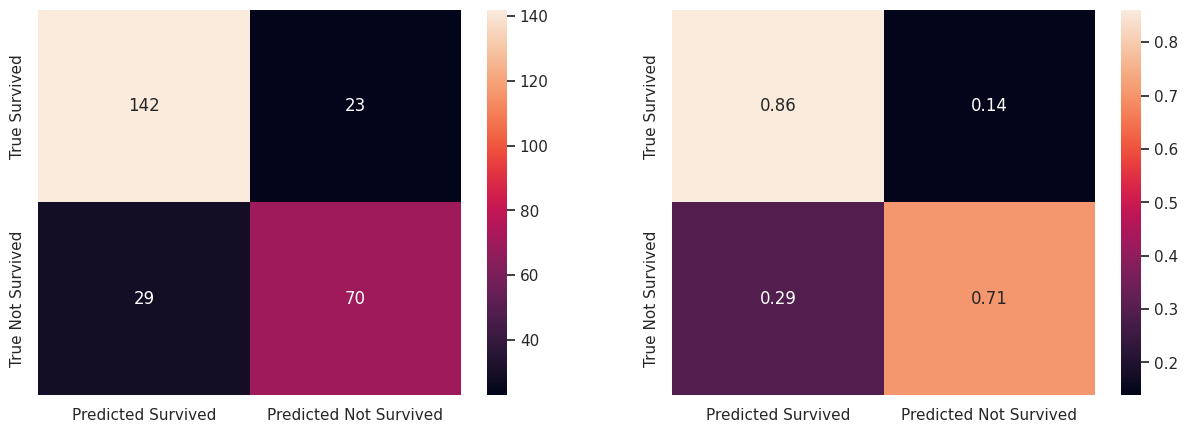

In [ ]:
cnf_matrix = confusion_matrix(y_eval, y_predict2)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [ ]:
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)

print (str(acc_log_reg) + ' percent')

83.73 percent


In [ ]:
acc_log_reg = round( clf.score(X_eval, y_eval) * 100, 2)

print (str(acc_log_reg) + ' percent')

80.3 percent


ML Model 3 - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_decision_tree = dt_clf.predict(X_eval)

In [ ]:
dt_acc_train = round( dt_clf.score(X_train, y_train) * 100, 2)

print (str(dt_acc_train) + ' percent')

87.72 percent


In [ ]:
dt_acc_eval = round( dt_clf.score(X_eval, y_eval) * 100, 2)

print (str(dt_acc_eval) + ' percent')

80.68 percent
